In [1]:
%matplotlib inline

from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
sns.set_style("white")
import glob
import json
import os
import sys
import shutil
import multiprocessing
pool = multiprocessing.Pool(multiprocessing.cpu_count())

def save_fig(ax, title, pdfname):
    ax.set_title(title)
    ax.get_figure().savefig(pdfname, bbox_inches="tight")



In [2]:
dvs = pd.read_csv("visual_sentiment.csv")
d(dvs)

,neg,neu,pos,image
0,0.243627,0.099862,0.656510,../../../images/500px_cc0/images/78827175_Mug_...
1,0.186535,0.308842,0.504624,../../../images/500px_cc0/images/162876571_amo...
2,0.376438,0.510715,0.112847,../../../images/500px_cc0/images/194901225_Fro...
3,0.278239,0.360714,0.361047,../../../images/500px_cc0/images/162077443_Sun...
4,0.094766,0.497986,0.407247,../../../images/500px_cc0/images/139228225_Sun...
...,...,...,...,...
1057,0.153218,0.565396,0.281386,../../../images/pixabay_first50k/images/nature...
1058,0.488797,0.318060,0.193143,../../../images/pixabay_first50k/images/potion...
1059,0.062217,0.571392,0.366391,../../../images/pixabay_first50k/images/wine-1...
1060,0.274270,0.337339,0.388391,../../../images/pixabay_first50k/images/waters...


In [3]:

df = dvs.melt(id_vars=['image'], value_vars=['pos', "neg", "neu"])
d(df)

,image,variable,value
0,../../../images/500px_cc0/images/78827175_Mug_...,pos,0.656510
1,../../../images/500px_cc0/images/162876571_amo...,pos,0.504624
2,../../../images/500px_cc0/images/194901225_Fro...,pos,0.112847
3,../../../images/500px_cc0/images/162077443_Sun...,pos,0.361047
4,../../../images/500px_cc0/images/139228225_Sun...,pos,0.407247
...,...,...,...
3181,../../../images/pixabay_first50k/images/nature...,neu,0.565396
3182,../../../images/pixabay_first50k/images/potion...,neu,0.318060
3183,../../../images/pixabay_first50k/images/wine-1...,neu,0.571392
3184,../../../images/pixabay_first50k/images/waters...,neu,0.337339


In [5]:
maxpos = df[df["variable"] =="pos"].sort_values(by="value").tail(10)["image"].tail(7).values[0].replace("../../", "")
d(maxpos)
! cp $maxpos visualsentiment_maxpos_$(basename $maxpos)

'../images/aadb/images/farm1_301_19659786384_c86c7e1f30_b.jpg'

In [6]:

maxneu = df[df["variable"] =="neu"].sort_values(by="value").tail(10)["image"].tail(9).values[0].replace("../../", "")
d(maxneu)

! cp $maxneu visualsentiment_maxneu_$(basename $maxneu)


'../images/500px_cc0/images/78892113_Valkenswaard.jpg'

In [7]:
maxneg = df[df["variable"] =="neg"].sort_values(by="value").tail(10)["image"].tail(7).values[0].replace("../../", "")
d(maxneg)

! cp $maxneg visualsentiment_maxneg_$(basename $maxneg)


'../images/koniq10k/images/7056790837.jpg'

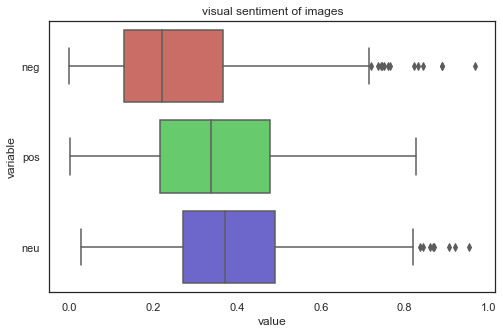

In [8]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")
ax = sns.boxplot(x="value", y="variable", data=df, order=["neg", "pos", "neu"], palette="hls")

save_fig(ax, "visual sentiment of images", "visualsentiment/visual_sentiment.pdf")